In [87]:
import pandas as pd
import datetime
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit

In [88]:
file_url="covid_19_data.csv"

df=pd.read_csv(file_url)

In [89]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14T16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15T18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0
5889,5890,03/15/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0


In [90]:
countries_list=df['Country/Region'].unique()

countries_list

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [91]:
corona_study={}
corona_average_daily_growth={}

for country in countries_list:
    df_country=df[df['Country/Region']==country]
    
    df_country_by_date=df_country.groupby(['ObservationDate']).sum()
    
    corona_study[country]={}
    corona_study[country]['confirmed']=df_country_by_date['Confirmed'].max()
    corona_study[country]['death']=df_country_by_date['Deaths'].max()
    corona_study[country]['recovered']=df_country_by_date['Recovered'].max()
    
    confirmed_series=list(df_country_by_date['Confirmed'])
    corona_average_daily_growth[country]=np.mean(np.diff(confirmed_series))

C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [92]:
corona_study['China'] = corona_study.pop('Mainland China')
corona_study['United States of America'] = corona_study.pop('US')
corona_study['United Kingdom'] = corona_study.pop('UK')
corona_study['Macedonia'] = corona_study.pop('North Macedonia')
corona_study['Azerbaijan'] = corona_study.pop(' Azerbaijan')
corona_study['Dominican Rep.'] = corona_study.pop('Dominican Republic')
corona_study['Czechia'] = corona_study.pop('Czech Republic')
corona_study['Bosnia and Herz.'] = corona_study.pop('Bosnia and Herzegovina')
corona_study['Guyana'] = corona_study.pop('French Guiana')
corona_study['eSwatini'] = corona_study.pop('Eswatini')
corona_study['Central African Rep.'] = corona_study.pop('Central African Republic')
corona_study['Eq. Guinea'] = corona_study.pop('Equatorial Guinea')
corona_study['Dem. Rep. Congo'] = corona_study.pop('Congo (Kinshasa)')

corona_average_daily_growth['China'] = corona_average_daily_growth.pop('Mainland China')
corona_average_daily_growth['United States of America'] = corona_average_daily_growth.pop('US')
corona_average_daily_growth['United Kingdom'] = corona_average_daily_growth.pop('UK')
corona_average_daily_growth['Macedonia'] = corona_average_daily_growth.pop('North Macedonia')
corona_average_daily_growth['Azerbaijan'] = corona_average_daily_growth.pop(' Azerbaijan')
corona_average_daily_growth['Dominican Rep.'] = corona_average_daily_growth.pop('Dominican Republic')
corona_average_daily_growth['Czechia'] = corona_average_daily_growth.pop('Czech Republic')
corona_average_daily_growth['Bosnia and Herz.'] = corona_average_daily_growth.pop('Bosnia and Herzegovina')
corona_average_daily_growth['Guyana'] = corona_average_daily_growth.pop('French Guiana')
corona_average_daily_growth['eSwatini'] = corona_average_daily_growth.pop('Eswatini')
corona_average_daily_growth['Central African Rep.'] = corona_average_daily_growth.pop('Central African Republic')
corona_average_daily_growth['Eq. Guinea'] = corona_average_daily_growth.pop('Equatorial Guinea')
corona_average_daily_growth['Dem. Rep. Congo'] = corona_average_daily_growth.pop('Congo (Kinshasa)')

In [93]:
import collections

counter = collections.Counter()
for d in [corona_study['Ireland'],corona_study['North Ireland']]: 
    counter.update(d)
corona_study['Ireland']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['Ireland'],corona_study['Republic of Ireland']]: 
    counter.update(d)
corona_study['Ireland']=dict(counter) 


counter = collections.Counter()
for d in [corona_study['Ireland'],corona_study['Republic of Ireland']]: 
    counter.update(d)
corona_study['Ireland']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['Dem. Rep. Congo'],corona_study['Congo (Brazzaville)']]: 
    counter.update(d)
corona_study['Dem. Rep. Congo']=dict(counter) 

In [113]:
import geopandas as  gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['confirmed'] = 0
world['death'] = 0
world['recovered'] = 0
world['daily_growth']=0
world['active_case']=0

In [132]:
for country,row in corona_study.items():
    if (len(world.loc[world['name'] == country])>0):
        country_index=world.loc[world['name'] == country].index[0]
        world.at[country_index,'confirmed']=math.log(corona_study[country]['confirmed']+1)
        world.at[country_index,'death']=math.log(corona_study[country]['death']+1)
        world.at[country_index,'recovered']=math.log(corona_study[country]['recovered']+1)
        world.at[country_index,'active_case']=math.log(corona_study[country]['confirmed']-corona_study[country]['death']-corona_study[country]['recovered']+1)
        if (not math.isnan(corona_average_daily_growth[country])):
            world.at[country_index,'daily_growth']=math.log(corona_average_daily_growth[country]+1)
    else:
        print(country)

Hong Kong
Macau
Singapore
Ivory Coast
Others
Bahrain
San Marino
North Ireland
Monaco
Andorra
Saint Barthelemy
Faroe Islands
Gibraltar
Liechtenstein
Vatican City
Malta
Martinique
Republic of Ireland
Maldives
St. Martin
occupied Palestinian territory
('St. Martin',)
Channel Islands
Holy See
Reunion
Cayman Islands
Guadeloupe
Antigua and Barbuda
Aruba
Jersey
Seychelles
Curacao
Guernsey
Saint Lucia
Saint Vincent and the Grenadines
Congo (Brazzaville)


In [133]:
math.exp(3)

20.085536923187668

In [134]:
world['death_rate']=(np.exp(world['death'])-1)/(np.exp(world['confirmed'])-1)
world['recovered_rate']=(np.exp(world['recovered'])-1)/(np.exp(world['confirmed'])-1)

Text(0.5, 1.0, 'Visualization of Confirmed case map')

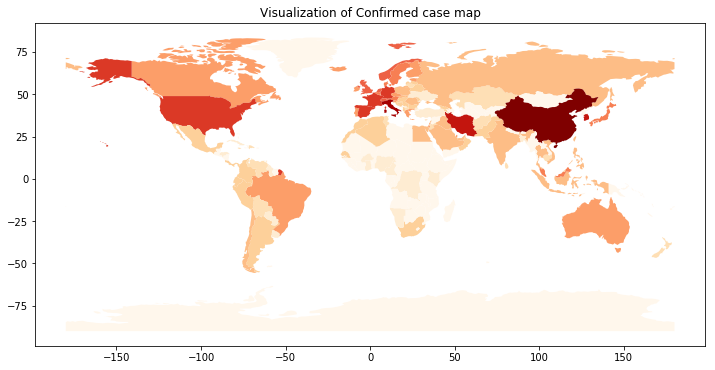

In [135]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='confirmed', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Confirmed case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Active case map')

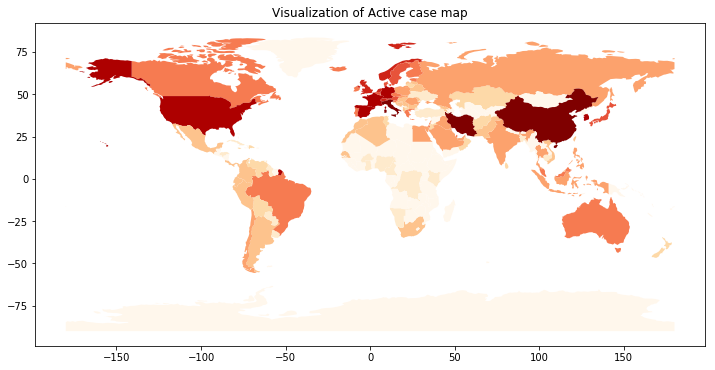

In [136]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='active_case', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Active case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Death case map')

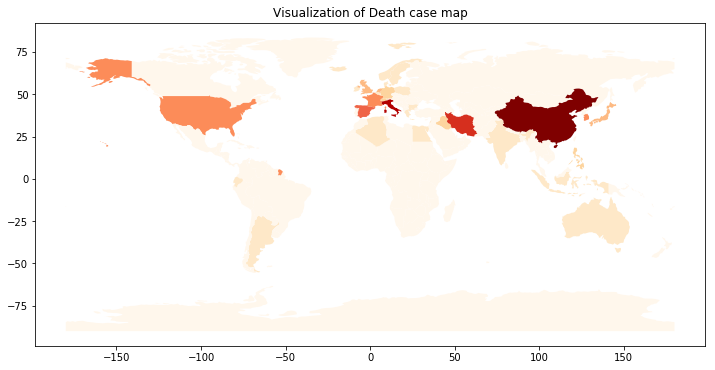

In [137]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Death case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Recovered case map')

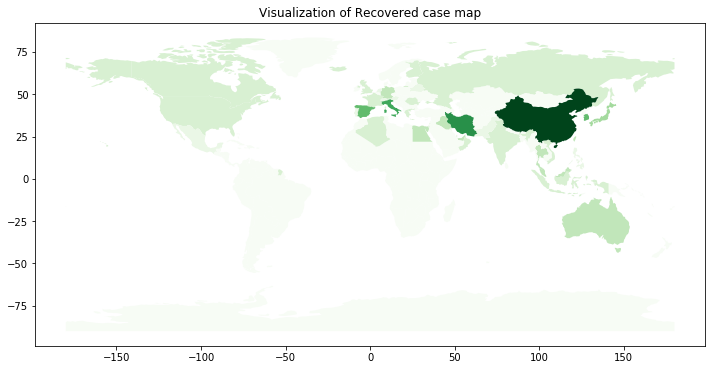

In [138]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered', cmap='Greens',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Recovered case map", fontsize=12)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'Visualization of death rate map')

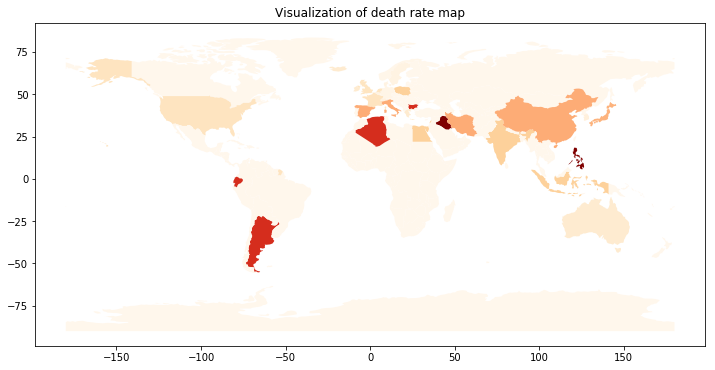

In [139]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death_rate', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of death rate map", fontsize=12)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'Visualization of recovered rate map')

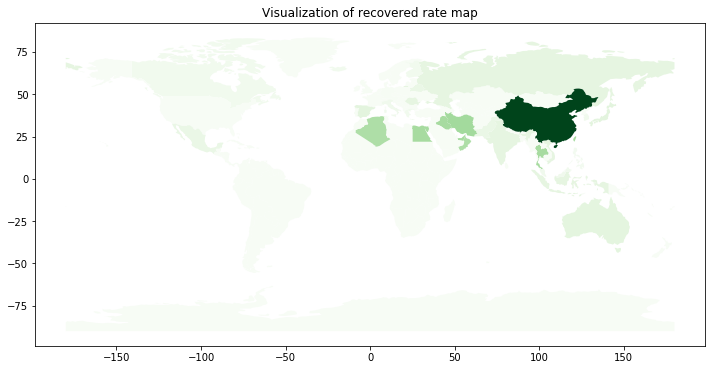

In [140]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered_rate', cmap='Greens',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of recovered rate map", fontsize=12)

Text(0.5, 1.0, 'Visualization of daily growth of confirmed case map')

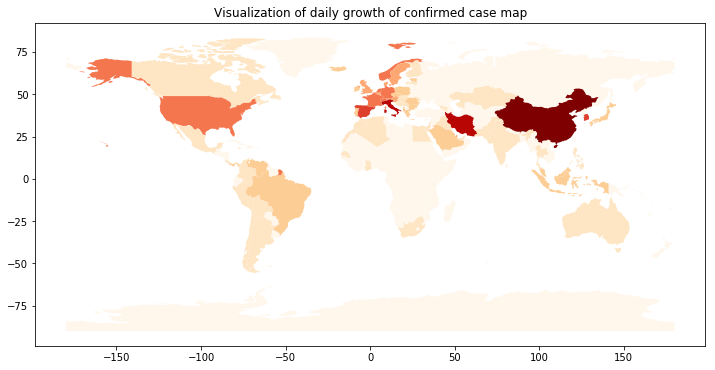

In [141]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='daily_growth', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of daily growth of confirmed case map", fontsize=12) 